# **What will the next highest grossing mobile game in the US look like?**


Author:     Sage (Shijie) Ren

Instructor: Adam Anderson

Course:     Digital Humanities 100 - Theory and method of digital humanities

Date:       June 2021

Introduction: 

With the pandemic in the past year, more and more people have enjoyed their new past time -- video gaming, and with the accessibilities of mobile phones and rising equality of genders in gaming, mobile games have become prevalently popular. 

Many developers and business-minded perople alike have been asking oneself the same question, what will the highest grossing mobile game look like in the future?

This notebook would be divided into 6 sections:
1. Primary libraries and dataset import
2. Data cleaning and selection
3. Data visualization
4. Inference and Prediction
5. What are some confounding factors and where to go from here.


# 1. Frameworks, Libraries and Datasets

In [2]:
from datascience import *
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The following datasets and csvs are published by GameRefinery, April 2021, in GameRefinery Q1 2021 Snapshot Report, Page 6-9. You can find out more at https://www.gamerefinery.com/q1-2021-market-snapshot-report/

This table, called companies_by_market_share, shows the top 10 publiser in the apple app store by share percentage for the 1st quarter of 2021.

In [3]:
companies_by_market_share = Table.read_table("Market-Share.csv")
companies_by_market_share = companies_by_market_share.select(1,2).take(range(4,14))
companies_by_market_share.relabel(0,"Publisher").relabel(1,"Revenue Share(%)")

Publisher,Revenue Share(%)
Roblox,5.52
Playrix,4.74
King,4.55
Supercell,2.89
Niantic,2.31
Magic Tavern,2.21
Scopely,2.17
Zynga,2.09
Playtika,2.06
Peak Games,1.98


It is not hard to also find out that for each publisher, what gaming engine they use, and thus we will build upon the previous table:

In [4]:
companies_with_engines = companies_by_market_share.with_column("Game Engine",make_array("Internal","Internal","Internal","Internal","Internal","Internal","Internal","Coco2ds","Monosyne","Internal"))
companies_with_engines.show()

Publisher,Revenue Share(%),Game Engine
Roblox,5.52,Internal
Playrix,4.74,Internal
King,4.55,Internal
Supercell,2.89,Internal
Niantic,2.31,Internal
Magic Tavern,2.21,Internal
Scopely,2.17,Internal
Zynga,2.09,Coco2ds
Playtika,2.06,Monosyne
Peak Games,1.98,Internal


The next table we collected from a CSV file published by GameRefinery shows us the current distribution of mobile gaming revenue in the united states as of 1st quarter 2021, by genre. 

In [52]:
revenue_by_genre = Table.read_table("Genre-Revenue.csv")
revenue_by_genre = revenue_by_genre.select(1,2).take(range(4,14))
revenue_by_genre.relabel(0,"Genre").relabel(1,"Revenue Share(%)")

Genre,Revenue Share(%)
Puzzle,22.87
Casino,19.23
Strategy,15.54
RPG,13.8
Simulation,10.93
Shooter,5.32
Lifestyle,3.9
Sports,3.04
AR/Location based,2.42
Driving,1.29


The table below shows the Growth Rate of mobile gaming revenue in the United Satates as of 1st quarter by genre.

In [53]:
growth_by_genre = Table.read_table("Genre-Revenue-Growth.csv")
growth_by_genre = growth_by_genre.select(1,2).take(range(4,14))
growth_by_genre.relabel(0,"Genre").relabel(1,"Growth(%)")

Genre,Growth(%)
Simulation,63.2
Racing,51.9
Casino,46.4
Lifestyle,36.7
Shooter,36.2
Arcade,32.8
RPG,27.6
Puzzle,23.7
Sports,18.1
Strategy,16.7


The table below shows the daily revenue of the top 10 grossing mobile game in dollars.

In [7]:
daily_revenue_game = Table.read_table("Daily-Revenue-Game.csv")
daily_revenue_game = daily_revenue_game.select(1,2).take(range(4,14))
daily_revenue_game.relabel(0,"Genre").relabel(1,"Dollars($)")

Genre,Dollars($)
Roblox,"3,093,504"
Candy Crush Saga,"2,026,652"
Coin Master,"1,095,882"
State of Survival: Zombie War,"940,076"
Homescapes,"776,355"
PUBG MOBILE 3RD ANNIVERSARY,"477,918"
Pokémon GO,"463,580"
Clash of Clans,"456,715"
Project Makeover,"399,406"
Gardenscapes,"257,467"


This table shows The preference of activities by new and exisiting gamers.


In [41]:
weekly_activity = Table.read_table("Weekly-Activity.csv")
weekly_activity = weekly_activity.select(1,2,3).take(range(4,16))
weekly_activity.relabel(0,"Genre").relabel(1,"New Gamers(%)").relabel(2,"Existing Gamers(%)")
weekly_activity.show()

Genre,New Gamers(%),Existing Gamers(%)
Playing single player/by myself,87,87
Playing with friends/family online,50,36
Playing with strangers online,49,36
Connecting my social media account to the game,49,33
Playing with friends/family in the same room,44,32
Participating in a limited-time event in a game,41,31
Sending requests for help/items to others from the game,40,26
Using a standalone app to talk with friends/family onlin ...,36,23
Participating in in-game tournaments,38,23
Getting advice from others on how to play better,34,22


This table shows the preference of monetization by new gamers. 

In [9]:
monetization_new_player = Table.read_table("monetization-new-player.csv")
monetization_new_player = monetization_new_player.select(1,2).take(range(4,9))
monetization_new_player.relabel(0,"Monetization").relabel(1,"United States(%)")
monetization_new_player.show()

Monetization,United States(%)
Ad-support models,35
Free-to-play IAP,25
"Game purchase, no ads",19
Battle pass,13
Monthly fee for game bundles,8


This table shows the preference of monetization by existing gamers. 

In [10]:
monetization_existing_player = Table.read_table("monetization-existing-player.csv")
monetization_existing_player = monetization_existing_player.select(1,2).take(range(4,9))
monetization_existing_player.relabel(0,"Monetization").relabel(1,"United States(%)")
monetization_existing_player.show()

Monetization,United States(%)
Ad-support models,43
Free-to-play IAP,24
"Game purchase, no ads",16
Battle pass,12
Monthly fee for game bundles,6


# 2. Data Cleaning and Selection

Firstly, we have already combined the company share table and game engine table

In [11]:
companies_with_engines.show()

Publisher,Revenue Share(%),Game Engine
Roblox,5.52,Internal
Playrix,4.74,Internal
King,4.55,Internal
Supercell,2.89,Internal
Niantic,2.31,Internal
Magic Tavern,2.21,Internal
Scopely,2.17,Internal
Zynga,2.09,Coco2ds
Playtika,2.06,Monosyne
Peak Games,1.98,Internal


Next, we will combine revenue and growth by genre.

In [54]:
genre = revenue_by_genre.join("Genre",growth_by_genre)
genre.show()

Genre,Revenue Share(%),Growth(%)
Casino,19.23,46.4
Lifestyle,3.9,36.7
Puzzle,22.87,23.7
RPG,13.8,27.6
Shooter,5.32,36.2
Simulation,10.93,63.2
Sports,3.04,18.1
Strategy,15.54,16.7


The daily revenue of top 10 games does not really help this study, and therefore we do not select it. The weekly activity table is shown here:

In [42]:
weekly_activity.show()

Genre,New Gamers(%),Existing Gamers(%)
Playing single player/by myself,87,87
Playing with friends/family online,50,36
Playing with strangers online,49,36
Connecting my social media account to the game,49,33
Playing with friends/family in the same room,44,32
Participating in a limited-time event in a game,41,31
Sending requests for help/items to others from the game,40,26
Using a standalone app to talk with friends/family onlin ...,36,23
Participating in in-game tournaments,38,23
Getting advice from others on how to play better,34,22


Lastly, we will combine the monetization preference of new players table with monetization preference of existing players table.

In [16]:
monetization = monetization_new_player.join("Monetization",monetization_existing_player)
monetization.show()

Monetization,United States(%),United States(%)_2
Ad-support models,35,43
Battle pass,13,12
Free-to-play IAP,25,24
"Game purchase, no ads",19,16
Monthly fee for game bundles,8,6


# 3. Data Visualization and Prediction

In the companies_with_engine table, we will first visualization the market revenue share.

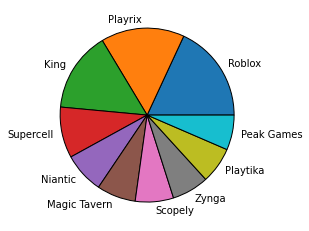

In [21]:
plt.pie(companies_with_engines.column("Revenue Share(%)"),labels=companies_with_engines.column("Publisher"))
plt.show()

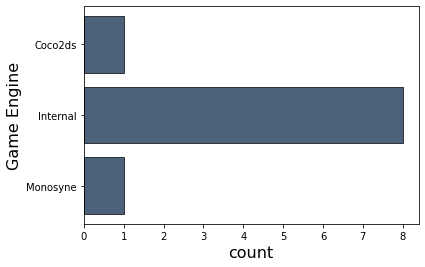

In [23]:
companies_with_engines.group("Game Engine").barh("Game Engine")

**As we can see that most of the popular publisher uses their internal engine, it is obvious that in order to create the next highest grossing mobile game, one would need to use their internal engine.**

In order to combine the numerical analysis of revenue share and revenue growth, we designed a revenue index where it is Revenue Share * (1 + Growth/100), where it will sufficiently show the current market share and its forecasted growth in the future.

In [58]:
genre_index = genre.column("Revenue Share(%)")*(1 + genre.column("Growth(%)")/100)
new_genre = genre.with_column("Index",genre_index)
new_genre.show()

Genre,Revenue Share(%),Growth(%),Index
Casino,19.23,46.4,28.1527
Lifestyle,3.9,36.7,5.3313
Puzzle,22.87,23.7,28.2902
RPG,13.8,27.6,17.6088
Shooter,5.32,36.2,7.24584
Simulation,10.93,63.2,17.8378
Sports,3.04,18.1,3.59024
Strategy,15.54,16.7,18.1352


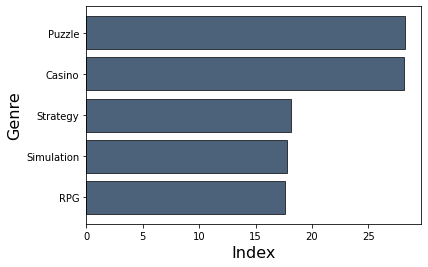

In [60]:
new_genre.sort("Index",descending=True).take(np.arange(5)).barh("Genre","Index")

**We can see in clear details that Puzzle Game and Casino Game are tied, so the next highest grossing moble game in the US would be a combination of Puzzle/Casino**

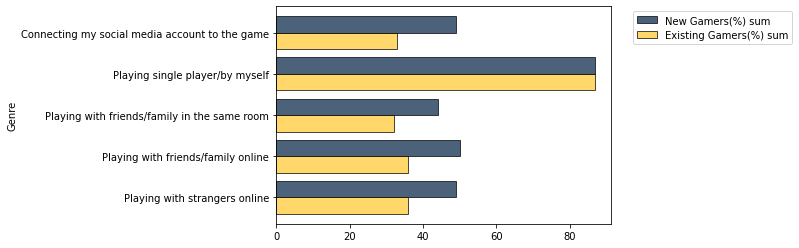

In [44]:
weekly_activity = weekly_activity.select("Genre").with_column("New Gamers(%)",map(int,(weekly_activity.column("New Gamers(%)")))).with_column("Existing Gamers(%)",map(int,(weekly_activity.column("Existing Gamers(%)"))))
weekly_activity.take(np.arange(5)).group("Genre",sum).barh("Genre")

**Surprising, contrary to popular beliefs that player versus player is the dominant grossing genre, the top reason for players to play game is actually playing single players or by oneself.**

Here, we will also design an index where we combine the interest of new and existing gamers. It is calculated as the product of new and existing player's preference.

In [68]:
new_monetization = monetization.select("Monetization").with_column("New Gamers",map(int,(monetization.column("United States(%)")))).with_column("Existing Gamers",map(int,(monetization.column("United States(%)_2"))))
m_index = new_monetization.column("New Gamers")*new_monetization.column("Existing Gamers")
new_monetization = new_monetization.with_column("Monetization Index", m_index)
new_monetization.show()

Monetization,New Gamers,Existing Gamers,Monetization Index
Ad-support models,35,43,1505
Battle pass,13,12,156
Free-to-play IAP,25,24,600
"Game purchase, no ads",19,16,304
Monthly fee for game bundles,8,6,48


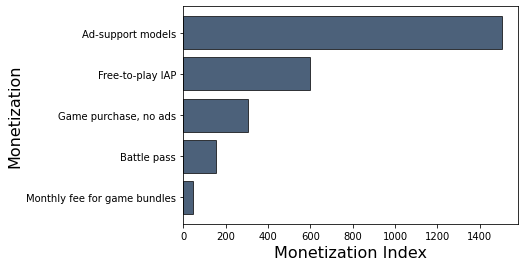

In [69]:
new_monetization.sort("Monetization Index", descending=True).barh("Monetization","Monetization Index")

**It is obvious that the ad-support models is the crowd's favorite, next would be free to play in app purchase, since game purchase with no ads contradict with the previous 2 models, we eliminate the 3rd category. Battle Pass would also be a nice way to monetize one's game.**

# 4. Prediction and Conclusion

**In conclusion, the next highest grossing game would use its own internal engine, be a puzzle/casino game, be a single player gamer with limited pvp feature, and is free to play with in app purchase, with ads, and with battle pass.**

# 5. Confounding Factors and What's Next

The dataset only focuses on the first quarter of 2021. With the pandemic and many political factors, alongside with a short time frame, the data could be not as accurate as if the dataset is spanned along a longer timeframe. 